This is an investigation into data containing information about animal bites in the area of Louisville, Kentucky from 1985 to 2017. We will be investigating what animals bite humans most often, where they bite humans, when they bite humans and lastly what kind of dog breeds bite humans most often.

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading in data
df = pd.read_csv('Health_AnimalBites.csv')

In [3]:
#intro look into the data
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [4]:
df.shape

(9003, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [6]:
#EDA on type of animal and where the bites occured
print(df['SpeciesIDDesc'].unique())
print(df['WhereBittenIDDesc'].unique())

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' nan 'HORSE' 'SKUNK' 'FERRET']
['BODY' 'HEAD' nan 'UNKNOWN']


In [7]:
df['SpeciesIDDesc'].value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

In [8]:
df['WhereBittenIDDesc'].value_counts()

BODY       6213
HEAD       1244
UNKNOWN     930
Name: WhereBittenIDDesc, dtype: int64

Type of Animal Bites

In [9]:
species = df.SpeciesIDDesc
species = species.dropna() #drop nan values in species feature
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


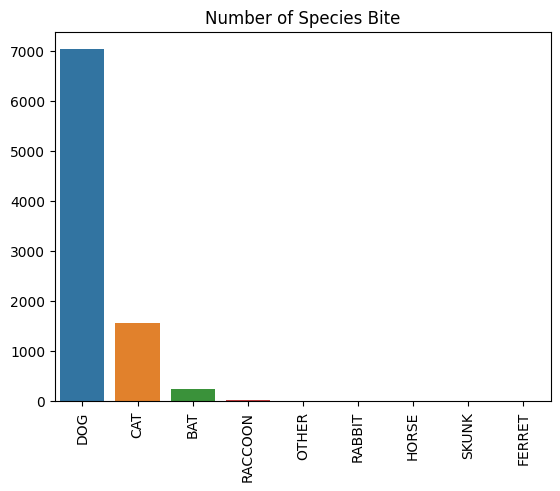

In [10]:
animal_list = []
for i in speciesOfAnimal:
    animal_list.append(len(species[species==i]))
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=90)
print(animal_list)

Looks like unsurprisingly dogs have the most bites followed by cats and then a number of other animals.

In [ ]:
Where animals bite

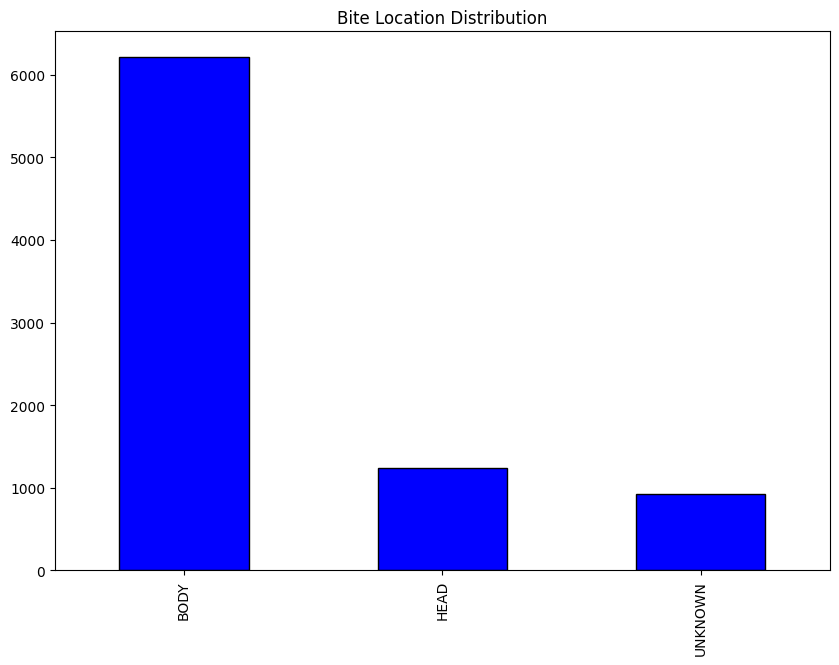

In [26]:
#plot bar chart of bite location distribution
location = df["WhereBittenIDDesc"]
plt.figure(figsize=(10 , 7))
location.value_counts().plot(
    kind="bar",
    title="Bite Location Distribution",
    color="blue",
    edgecolor="black"
)
plt.show()

Large majority of bites occur on the body.

Type of animals and where they bite

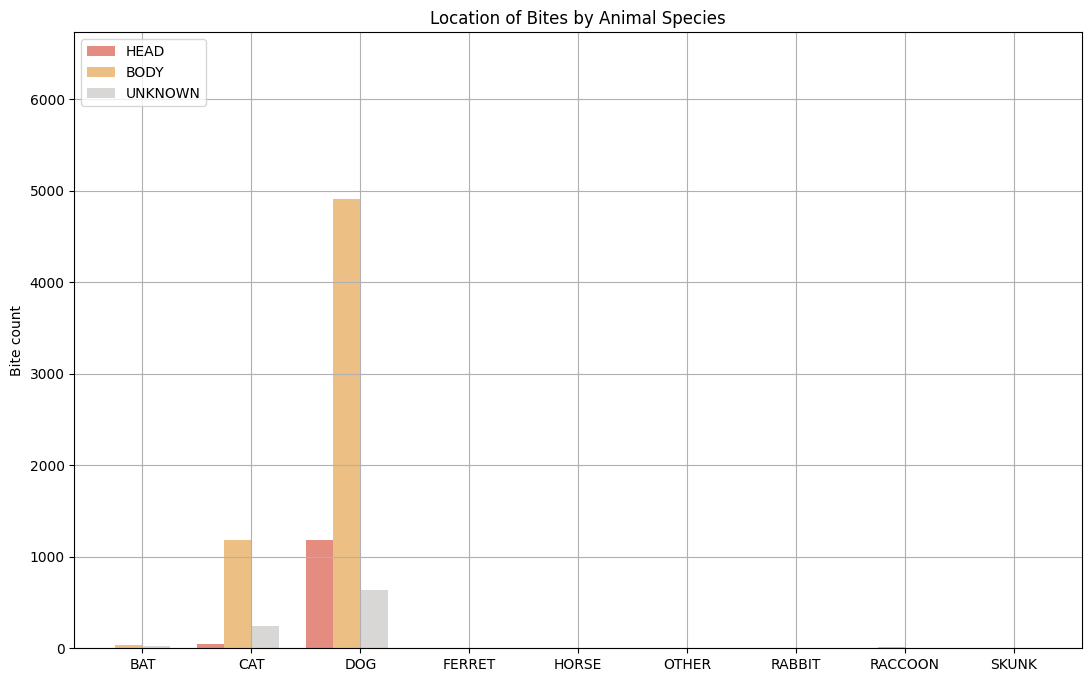

In [28]:
#drawing a grouped bar chart for the bite locations for each animal species
animal = df["SpeciesIDDesc"]
table = pd.crosstab(animal,location)
animalslist = []
for x in animal.unique():
    if isinstance(x,str):
        animalslist.append(x)

animalslist = sorted(animalslist)

pos = list(range(len(table["HEAD"]))) 
width = 0.25

fig, ax = plt.subplots(figsize=(13,8))

plt.bar(pos, 
        table['HEAD'], 
        width, 
        alpha=0.5, 
        color='#CD1A05', 
        label=animalslist[0])

plt.bar([p + width for p in pos], 
        table['BODY'],
        width, 
        alpha=0.5, 
        color='#DB820A', 
        label=animalslist[1]) 

plt.bar([p + width*2 for p in pos],
        table["UNKNOWN"], 
        width, 
        alpha=0.5, 
        color='#B3B1AE', 
        label=animalslist[2]) 

ax.set_ylabel('Bite count')
ax.set_title('Location of Bites by Animal Species')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(animalslist)

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(table['HEAD'] + table['BODY'] + table['UNKNOWN'])] )

plt.legend(['HEAD', 'BODY', 'UNKNOWN'], loc='upper left')
plt.grid()
plt.show()

Nearly all the head bites occur from dogs with basically every other animal biting just the body. 

When animals bite

In [21]:
#defining forumla that takes animal type and creates bar graph with each month having a total count of bites from that animal
def animal_month(animal,data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']
    numberOfAnimal = []
    for i in month_list:
        x = data.loc[(data['SpeciesIDDesc']==animal)&(data['bite_date'].str.split('-').str[1]==i)]
        numberOfAnimal.append(len(x))
    ax = sns.barplot(x=month_list,y=numberOfAnimal,palette  = "Reds")
    plt.title(animal + ' bite for 12 month')

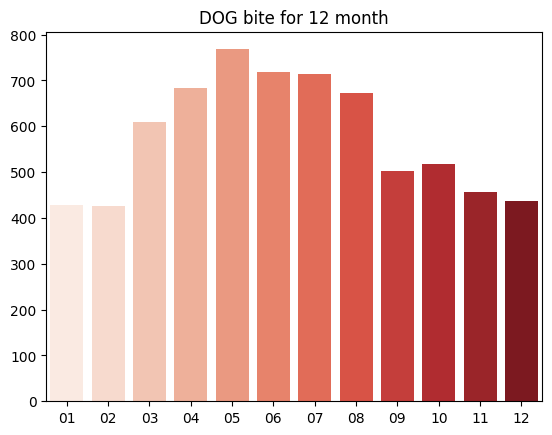

In [22]:
# Dogs mostly bites at 5th month
animal_month('DOG',df)

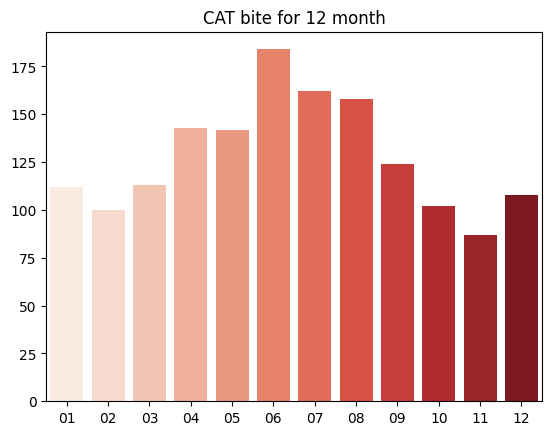

In [23]:
# Cats mostly bites at 6th month
animal_month('CAT',df)

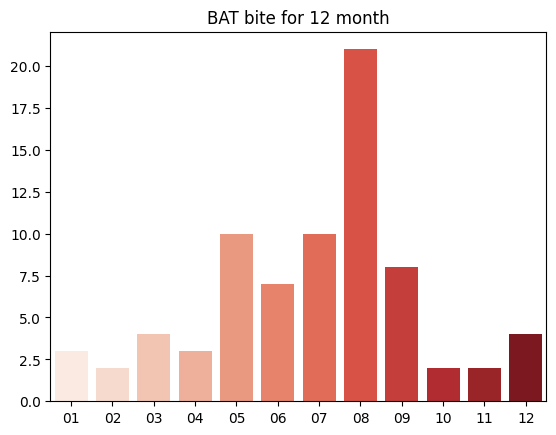

In [24]:
# Bats mostly bites at 8th month
animal_month('BAT',df)

Most aggressive dog bites

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object')


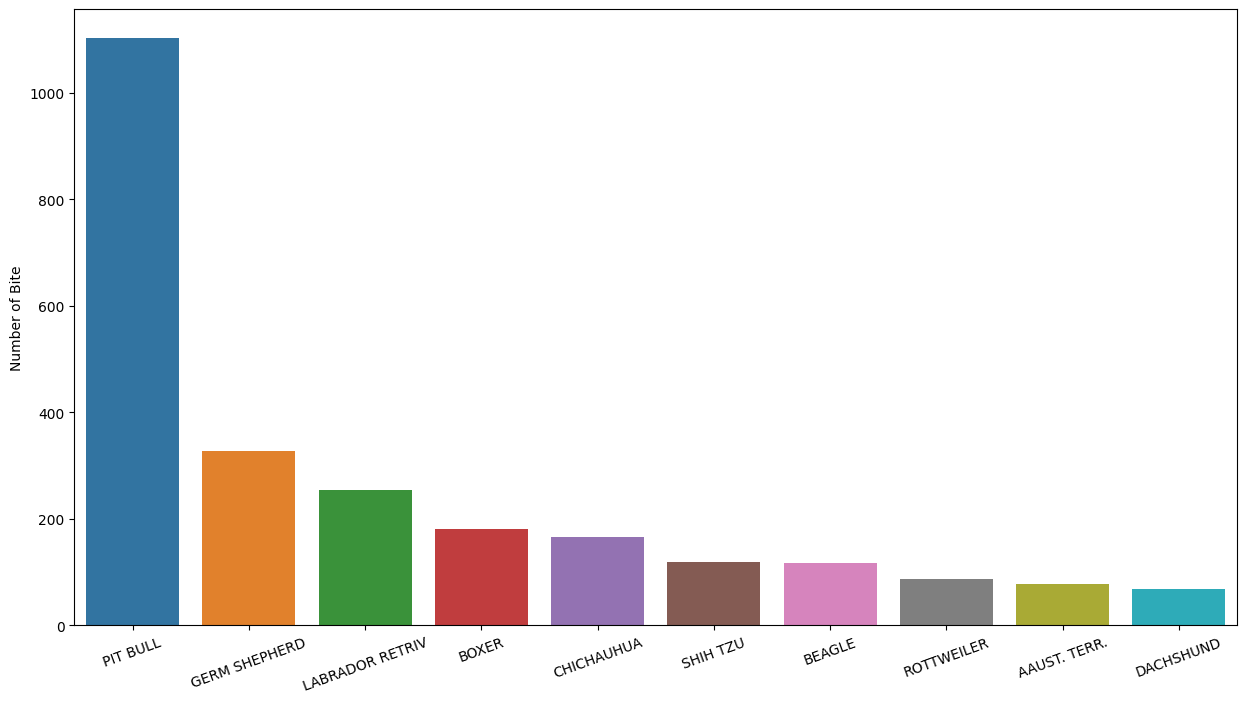

In [25]:
#creating car graph with the count of bites from the 10 most common breeds of dog bites
count = df.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bites")
plt.savefig('graph.png')

print(count[0:10].index)

Pit bulls have a reputation for being aggressive so this confirms that. German sheperds have a similar reputation but in a more controlled manner (they are the typically usede police dog), so it is a bit surprising to see them so high on this list. Labs are the most common dog so that is not surprising.